# Simulate RN + GWB in pulsars

In [1]:
from pta_replicator_main.pta_replicator.simulate import load_from_directories
from pta_replicator_main.pta_replicator.simulate import make_ideal
from pta_replicator_main.pta_replicator.white_noise import add_measurement_noise
from pta_replicator_main.pta_replicator.red_noise import add_red_noise, add_gwb
from pta_replicator_main.pta_replicator.deterministic import add_cgw

import pickle
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from random import sample, seed

import params_injected
from pulsar_phase import get_psr_phase

In [3]:
pardir = 'partim/par'
timdir = 'partim/tim'
num_psrs = params_injected.num_psrs
# psrs = load_from_directories(pardir, timdir, num_psrs=num_psrs)
psrs_full = load_from_directories(pardir, timdir, num_psrs=50)
seed(0)
psrs = sample(psrs_full, k=num_psrs)

2025-07-24 13:19:37.476 | DEBUG    | pint.toa:__init__:1358 - No pulse number flags found in the TOAs
2025-07-24 13:19:37.478 | DEBUG    | pint.toa:apply_clock_corrections:2200 - Applying clock corrections (include_gps = True, include_bipm = True)
2025-07-24 13:19:37.484 | INFO     | pint.observatory:gps_correction:210 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-07-24 13:19:37.485 | INFO     | pint.observatory:bipm_correction:217 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2025-07-24 13:19:37.485 | INFO     | pint.observatory.topo_obs:clock_corrections:351 - Applying observatory clock corrections for observatory='gbt'.
2025-07-24 13:19:37.527 | DEBUG    | pint.toa:compute_TDBs:2251 - Computing TDB columns.
2025-07-24 13:19:37.528 | DEBUG    | pint.toa:compute_TDBs:2272 - Using EPHEM = DE440 for TDB calculation.
2025-07-24 13:19:37.543 | DEBUG    | pint.toa:get_TOAs:312 - Planet PosVels will be calculated.
2025-07-24 13:19:37.543 | DEBUG    | pint.toa

In [4]:
# add signals and noise
psr_phases = np.zeros(num_psrs)
for ii, psr in enumerate(psrs):

    ## make ideal
    make_ideal(psr)

    ## add efacs
    # ## if you use flags, the flags and efac and equad values all need to have the same number of elements
    # add_measurement_noise(psr,
    #                       efac=params_injected.efac_inj, 
    #                       seed=params_injected.efac_seed + ii)

    # ## add red noise
    # if params_injected.rn_model:
    #     add_red_noise(psr,
    #                 log10_amplitude=params_injected.RN_logamps_inj[ii],
    #                 spectral_index=params_injected.RN_gammas_inj[ii],
    #                 components=params_injected.num_modes,
    #                 seed=params_injected.RN_seed + ii)
    
    # ## add continuous wave
    # if params_injected.cw_model:
    #     ent_psr = psr.to_enterprise()
    #     psr_dist = ent_psr.pdist[0]
    #     psr_phase = get_psr_phase(params_injected.CW_params_inj, ent_psr.pos, psr_dist)
    #     psr_phases[ii] = psr_phase
    #     psr_params = np.array([psr_dist, psr_phase])
    #     add_cgw(psr, params_injected.CW_params_inj, psr_params, ent_psr.toas, ent_psr.pos)

    print(ii, psr.name)

2025-07-24 13:19:47.928 | DEBUG    | pint.toa:compute_TDBs:2251 - Computing TDB columns.
2025-07-24 13:19:47.928 | DEBUG    | pint.toa:compute_TDBs:2253 - tdb column already exists. Deleting...
2025-07-24 13:19:47.929 | DEBUG    | pint.toa:compute_TDBs:2256 - tdbld column already exists. Deleting...
2025-07-24 13:19:47.929 | DEBUG    | pint.toa:compute_TDBs:2272 - Using EPHEM = DE440 for TDB calculation.
2025-07-24 13:19:47.946 | DEBUG    | pint.toa:compute_posvels:2345 - Computing PosVels of observatories, Earth and planets, using DE440
2025-07-24 13:19:47.946 | DEBUG    | pint.toa:compute_posvels:2355 - Column ssb_obs_pos already exists. Removing...
2025-07-24 13:19:47.947 | DEBUG    | pint.toa:compute_posvels:2355 - Column ssb_obs_vel already exists. Removing...
2025-07-24 13:19:47.947 | DEBUG    | pint.toa:compute_posvels:2355 - Column obs_sun_pos already exists. Removing...
2025-07-24 13:19:47.948 | DEBUG    | pint.toa:compute_posvels:2360 - Column obs_jupiter_pos already exists. 

0 J1312+0051


2025-07-24 13:19:48.479 | DEBUG    | pint.toa:compute_TDBs:2251 - Computing TDB columns.
2025-07-24 13:19:48.480 | DEBUG    | pint.toa:compute_TDBs:2253 - tdb column already exists. Deleting...
2025-07-24 13:19:48.480 | DEBUG    | pint.toa:compute_TDBs:2256 - tdbld column already exists. Deleting...
2025-07-24 13:19:48.481 | DEBUG    | pint.toa:compute_TDBs:2272 - Using EPHEM = DE440 for TDB calculation.
2025-07-24 13:19:48.497 | DEBUG    | pint.toa:compute_posvels:2345 - Computing PosVels of observatories, Earth and planets, using DE440
2025-07-24 13:19:48.498 | DEBUG    | pint.toa:compute_posvels:2355 - Column ssb_obs_pos already exists. Removing...
2025-07-24 13:19:48.498 | DEBUG    | pint.toa:compute_posvels:2355 - Column ssb_obs_vel already exists. Removing...
2025-07-24 13:19:48.499 | DEBUG    | pint.toa:compute_posvels:2355 - Column obs_sun_pos already exists. Removing...
2025-07-24 13:19:48.499 | DEBUG    | pint.toa:compute_posvels:2360 - Column obs_jupiter_pos already exists. 

1 J1909-3744
2 J1455-3330


2025-07-24 13:19:48.758 | DEBUG    | pint.toa:compute_TDBs:2251 - Computing TDB columns.
2025-07-24 13:19:48.759 | DEBUG    | pint.toa:compute_TDBs:2253 - tdb column already exists. Deleting...
2025-07-24 13:19:48.760 | DEBUG    | pint.toa:compute_TDBs:2256 - tdbld column already exists. Deleting...
2025-07-24 13:19:48.760 | DEBUG    | pint.toa:compute_TDBs:2272 - Using EPHEM = DE440 for TDB calculation.
2025-07-24 13:19:48.776 | DEBUG    | pint.toa:compute_posvels:2345 - Computing PosVels of observatories, Earth and planets, using DE440
2025-07-24 13:19:48.777 | DEBUG    | pint.toa:compute_posvels:2355 - Column ssb_obs_pos already exists. Removing...
2025-07-24 13:19:48.777 | DEBUG    | pint.toa:compute_posvels:2355 - Column ssb_obs_vel already exists. Removing...
2025-07-24 13:19:48.777 | DEBUG    | pint.toa:compute_posvels:2355 - Column obs_sun_pos already exists. Removing...
2025-07-24 13:19:48.778 | DEBUG    | pint.toa:compute_posvels:2360 - Column obs_jupiter_pos already exists. 

3 B1953+29


2025-07-24 13:19:49.177 | INFO     | pint.solar_system_ephemerides:load_kernel:127 - Set solar system ephemeris to de440 through astropy
2025-07-24 13:19:49.201 | DEBUG    | pint.toa:compute_posvels:2403 - SSB obs pos [-3.87409709e+09  1.34555717e+11  5.83294451e+10] m
2025-07-24 13:19:49.202 | INFO     | pint.solar_system_ephemerides:load_kernel:127 - Set solar system ephemeris to de440 through astropy
2025-07-24 13:19:49.205 | INFO     | pint.solar_system_ephemerides:load_kernel:127 - Set solar system ephemeris to de440 through astropy
2025-07-24 13:19:49.206 | INFO     | pint.solar_system_ephemerides:load_kernel:127 - Set solar system ephemeris to de440 through astropy
2025-07-24 13:19:49.207 | INFO     | pint.solar_system_ephemerides:load_kernel:127 - Set solar system ephemeris to de440 through astropy
2025-07-24 13:19:49.208 | INFO     | pint.solar_system_ephemerides:load_kernel:127 - Set solar system ephemeris to de440 through astropy
2025-07-24 13:19:49.209 | INFO     | pint.sol

4 J0709+0458


In [5]:
# if params_injected.gwb_model:
#         add_gwb(psrs,
#                 log10_amplitude=params_injected.GWB_logamp_inj,
#                 spectral_index=params_injected.GWB_gamma_inj,
#                 seed=params_injected.GWB_seed)

In [6]:
# # fit timing model
# for psr in psrs:
#     print(psr.name)
#     psr.fit()

J1312+0051


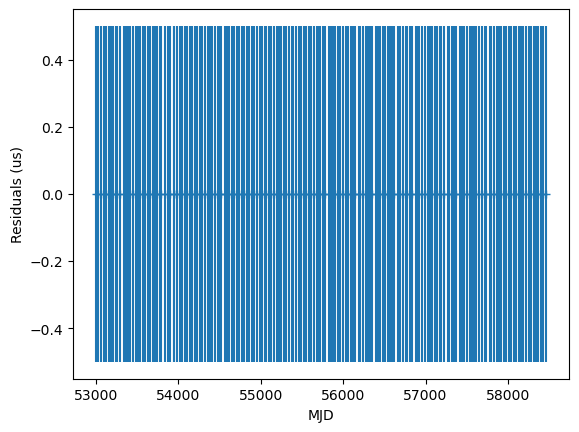

J1909-3744


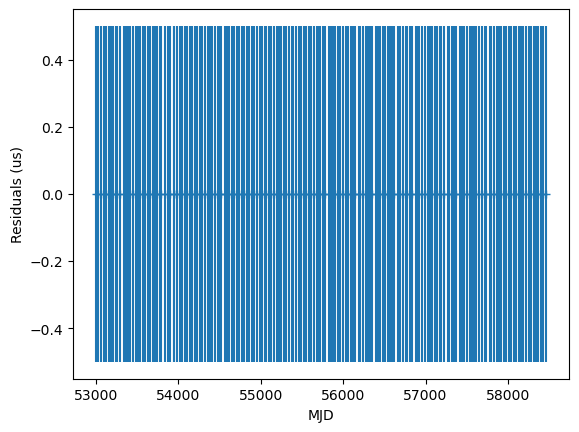

J1455-3330


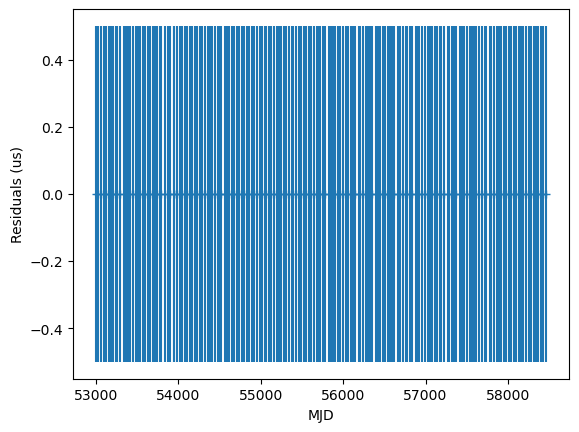

B1953+29


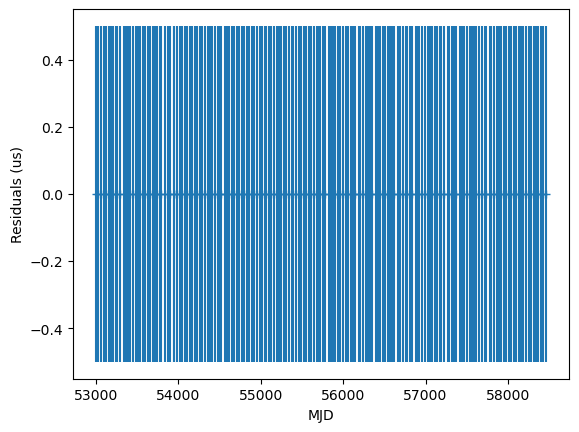

J0709+0458


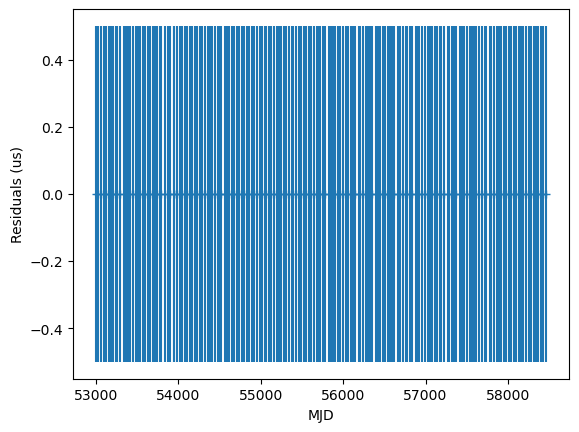

In [7]:
for psr in psrs:
    print(psr.name)
    plt.errorbar(
        psr.toas.get_mjds(),
        psr.residuals.time_resids.to_value("us"),
        psr.residuals.get_data_error().to_value("us"),
        marker="+",
        ls="",
    )
    plt.xlabel("MJD")
    plt.ylabel("Residuals (us)")
    plt.show()

In [8]:
dir(psr)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'added_signals',
 'ephem',
 'fit',
 'loc',
 'model',
 'name',
 'residuals',
 'to_enterprise',
 'toas',
 'update_added_signals',
 'update_residuals',
 'write_partim']

In [16]:
dir(psr.toas)

['__add__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 'add_vel_ecl',
 'adjust_TOAs',
 'alias_translation',
 'apply_clock_corrections',
 'check_hashes',
 'clock_corr_info',
 'commands',
 'compute_TDBs',
 'compute_posvels',
 'compute_pulse_numbers',
 'ephem',
 'filename',
 'first_MJD',
 'get_all_flags',
 'get_clusters',
 'get_dm_errors',
 'get_dms',
 'get_errors',
 'get_flag_value',
 'get_flags',
 'get_freqs',
 'get_highest_density_range',
 'get_mjds',
 'get_obs_groups',
 'get_obss',
 'get_pulse_numbers',
 'get_summary',
 'hashes',
 'is_wideband',
 'last_MJD',
 'm

In [21]:
psr.toas.to_TOA_list()

In [7]:
# convert to enterprise type pulsars
ent_psrs = []
for psr in psrs:
    ent_psrs.append(psr.to_enterprise())

2025-05-20 20:19:12.463 | INFO     | pint.solar_system_ephemerides:load_kernel:127 - Set solar system ephemeris to de440 through astropy
2025-05-20 20:19:12.481 | DEBUG    | pint.toa:add_vel_ecl:2467 - Adding column ssb_obs_vel_ecl
2025-05-20 20:19:12.482 | DEBUG    | pint.models.astrometry:ssb_to_psb_xyz_ECL:860 - ECL not specified; using IERS2010.
2025-05-20 20:19:12.926 | INFO     | pint.solar_system_ephemerides:load_kernel:127 - Set solar system ephemeris to de440 through astropy
2025-05-20 20:19:12.945 | DEBUG    | pint.toa:add_vel_ecl:2467 - Adding column ssb_obs_vel_ecl
2025-05-20 20:19:12.945 | DEBUG    | pint.models.astrometry:ssb_to_psb_xyz_ECL:860 - ECL not specified; using IERS2010.
2025-05-20 20:19:13.387 | INFO     | pint.solar_system_ephemerides:load_kernel:127 - Set solar system ephemeris to de440 through astropy
2025-05-20 20:19:13.406 | DEBUG    | pint.toa:add_vel_ecl:2467 - Adding column ssb_obs_vel_ecl
2025-05-20 20:19:13.406 | DEBUG    | pint.models.astrometry:ssb_

In [8]:
# save data
Ms = np.array([ent_psr.Mmat for ent_psr in ent_psrs])
toas = np.array([ent_psr.toas for ent_psr in ent_psrs])
residuals = np.array([ent_psr.residuals for ent_psr in ent_psrs])
psr_pos = np.array([ent_psr.pos for ent_psr in ent_psrs])
psr_names = np.array([ent_psr.name for ent_psr in ent_psrs])
psr_dists = np.array([[psr.pdist[0], psr.pdist[1]] for psr in ent_psrs]).T
np.save('data/Ms.npy', Ms)
np.save('data/toas.npy', toas)
np.save('data/residuals.npy', residuals)
np.save('data/psr_pos.npy', psr_pos)
np.save('data/psr_names.npy', psr_names)
np.save('data/psr_dists.npy', psr_dists)
np.save('data/psr_phases.npy', psr_phases)

In [9]:
# save Enterprise pulsar objects
with open('enterprise_pulsars.pkl', 'wb') as f:
    pickle.dump(ent_psrs, f)

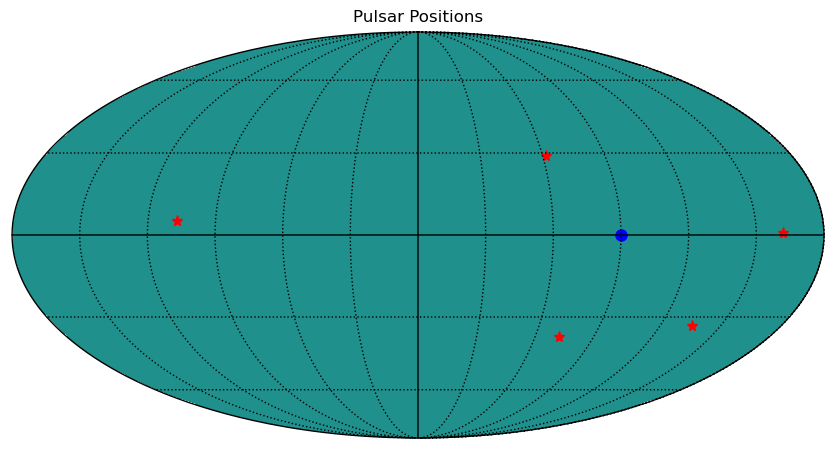

In [10]:
# plot pulsar positions
theta_psr = np.arccos(psr_pos[:, 2])  # z = cos(theta)
phi_psr = np.arctan2(psr_pos[:, 1], psr_pos[:, 0])  # atan2(y, x)
phi_psr = np.mod(phi_psr, 2 * np.pi)


# Convert to HEALPix map
nside = 64
npix = hp.nside2npix(nside)

# Plot
hp.mollview(np.zeros(hp.nside2npix(64)), title="Pulsar Positions", cbar=False)
hp.projplot(theta_psr, phi_psr, 'r*', markersize=8)
hp.projplot(params_injected.gwtheta_inj, params_injected.gwphi_inj, 'bo', markersize=8)
hp.graticule()
plt.show()